# Sistemas Biometricos

## Versions

In [1]:
!python --version
!pip3 --version

Python 3.10.1
pip 24.0 from C:\edb\languagepack\v4\Python-3.11\Lib\site-packages\pip (python 3.11)



## Install

In [2]:
!pip3 install wfdb
!pip3 install biosppy
!pip3 install neurokit2
!pip3 install tabulate

     ---------------------------------------- 0.0/59.7 kB ? eta -:--:--
     ---------------------------------- ----- 51.2/59.7 kB 1.3 MB/s eta 0:00:01
     ---------------------------------------- 59.7/59.7 kB 1.1 MB/s eta 0:00:00
     ---------------------------------------- 0.0/60.8 kB ? eta -:--:--
     ---------------------------------------- 60.8/60.8 kB 1.6 MB/s eta 0:00:00
     ---------------------------------------- 0.0/167.0 kB ? eta -:--:--
     -------------------------------- ----- 143.4/167.0 kB 4.3 MB/s eta 0:00:01
     -------------------------------------- 167.0/167.0 kB 2.5 MB/s eta 0:00:00
   ---------------------------------------- 0.0/160.0 kB ? eta -:--:--
   ----------------------------------- ---- 143.4/160.0 kB 4.3 MB/s eta 0:00:01
   ---------------------------------------- 160.0/160.0 kB 3.2 MB/s eta 0:00:00
   ---------------------------------------- 0.0/7.8 MB ? eta -:--:--
   - -------------------------------------- 0.2/7.8 MB 6.3 MB/s eta 0:00:02
   - --


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: C:\edb\languagepack\v4\Python-3.11\python.exe -m pip install --upgrade pip


   ---------------------------------------- 0.0/149.4 kB ? eta -:--:--
   ---------------------------------------- 149.4/149.4 kB 4.5 MB/s eta 0:00:00
   ---------------------------------------- 0.0/3.0 MB ? eta -:--:--
   -- ------------------------------------- 0.2/3.0 MB 6.3 MB/s eta 0:00:01
   ---- ----------------------------------- 0.4/3.0 MB 4.5 MB/s eta 0:00:01
   ------- -------------------------------- 0.6/3.0 MB 4.0 MB/s eta 0:00:01
   ---------- ----------------------------- 0.8/3.0 MB 4.1 MB/s eta 0:00:01
   ------------ --------------------------- 0.9/3.0 MB 3.9 MB/s eta 0:00:01
   ------------- -------------------------- 1.0/3.0 MB 3.9 MB/s eta 0:00:01
   ---------------- ----------------------- 1.3/3.0 MB 4.0 MB/s eta 0:00:01
   ------------------ --------------------- 1.4/3.0 MB 4.0 MB/s eta 0:00:01
   -------------------- ------------------- 1.5/3.0 MB 3.7 MB/s eta 0:00:01
   ---------------------- ----------------- 1.7/3.0 MB 3.9 MB/s eta 0:00:01
   -----------------


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: C:\edb\languagepack\v4\Python-3.11\python.exe -m pip install --upgrade pip


   ---------------------------------------- 0.0/693.1 kB ? eta -:--:--
   ---------- ----------------------------- 174.1/693.1 kB 5.3 MB/s eta 0:00:01
   ---------------- ----------------------- 286.7/693.1 kB 4.5 MB/s eta 0:00:01
   --------------------------- ------------ 471.0/693.1 kB 3.7 MB/s eta 0:00:01
   ------------------------------------ --- 634.9/693.1 kB 4.0 MB/s eta 0:00:01
   ---------------------------------------- 693.1/693.1 kB 3.7 MB/s eta 0:00:00



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: C:\edb\languagepack\v4\Python-3.11\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: C:\edb\languagepack\v4\Python-3.11\python.exe -m pip install --upgrade pip


## Imports

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from tabulate import tabulate
import wfdb
import os
#import scipy
#import sklearn
#import cv2
#import biosppy

#import neurokit2

## Load Data

In [7]:
dataset_path = "../../data/ecg_id" # path to the dataset
person_path = '{}/Person_{:02}'
record_path = '{}/rec_{}'
numb_persons = 90

def get_numb_records(path) -> int: 
    repeat = 3 # number of files per record
    numb_of_files = len(os.listdir(path))
    return int(numb_of_files/repeat) 

paths = [(person_path.format(dataset_path, i), i) for i in range(1, numb_persons+1)] # or [1,2,4]

data = [
    (wfdb.rdsamp(record_path.format(path, r)), p) 
             for path, p in paths 
                for r in range(1, get_numb_records(path) + 1) # or [1,2,3]
]

## Data Visualization

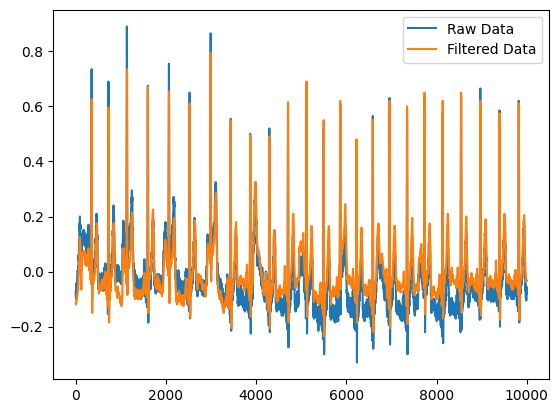

In [8]:
signal, fields  = data[0][0]

fs = fields['fs'] # frequency

plt.plot(signal[:,0], label='Raw Data') # raw data
plt.plot(signal[:,1], label='Filtered Data') # filtered data
plt.legend()
plt.show()

In [9]:
# Example data for the table
table_header = ["Number of Persons", "FS (hz)", "Sample time (sec)"]
table_data = [
    [numb_persons, fs, signal[:,0].shape[0]/fs],
]

table_string = tabulate(table_data, headers=table_header, tablefmt="grid")

print(table_string )


+---------------------+-----------+---------------------+
|   Number of Persons |   FS (hz) |   Sample time (sec) |
+=====================+===========+=====================+
|                  90 |       500 |                  20 |
+---------------------+-----------+---------------------+


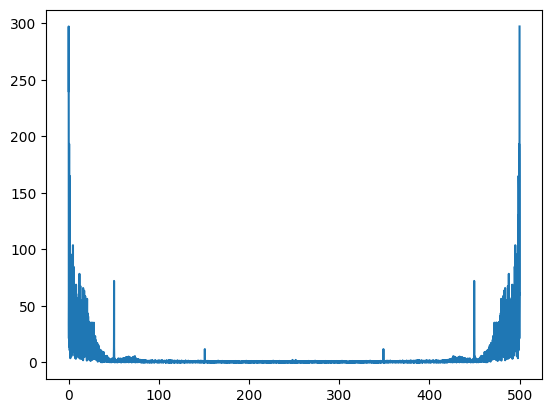

In [10]:
X = np.fft.fft(signal[:,0]) # 1 to filtered data
fs = fields['fs']
freq = np.arange(len(X))/len(X)*fs
plt.plot(freq,np.abs(np.abs(X)))
plt.show()

## BioSppy

In [11]:
from biosppy.signals import ecg

outs = [ (ecg.ecg(signal=s[:,1], sampling_rate=f['fs'], show=False), p) for ((s,f), p) in data ]

## Templates

In [12]:
print(outs[0][0]["templates"].shape)
labels = np.hstack([p for out, p in outs for i in range(out["templates"].shape[0])])
templates = np.vstack([ out["templates"] for out, p in outs])
templates_person = templates[labels == 1]
print(templates.shape)
print(labels.shape)
print(labels)

(23, 300)
(7850, 300)
(7850,)
[ 1  1  1 ... 90 90 90]


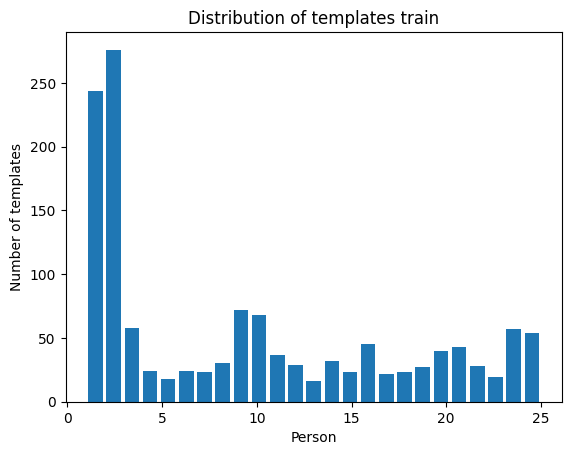

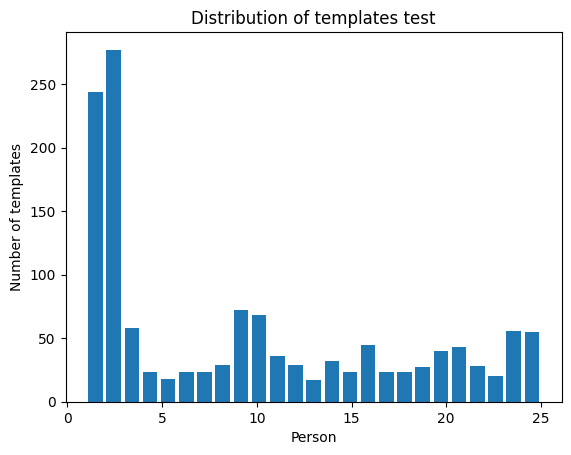

Accuracy: 0.97
Accuracy: 0.97
Accuracy: 0.95


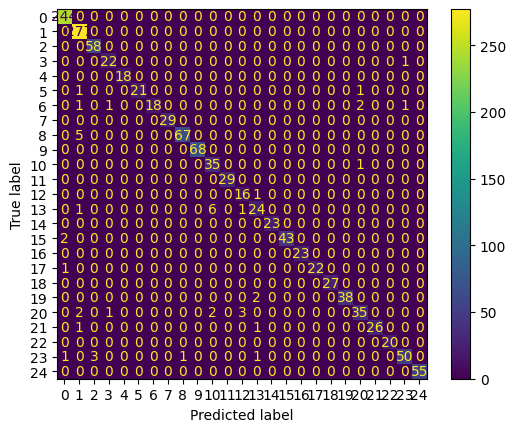

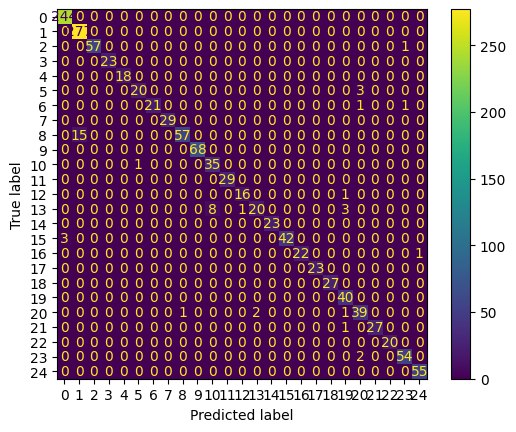

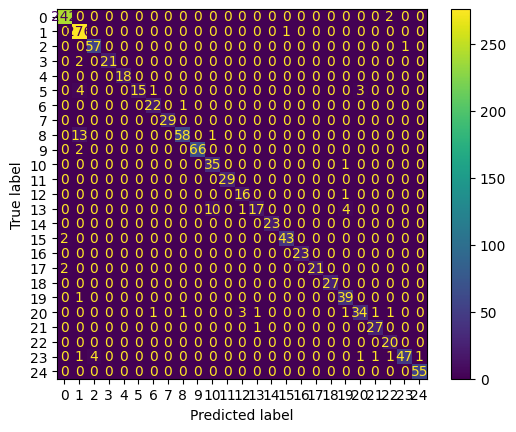

In [48]:
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay, precision_score, recall_score, f1_score
from sklearn.svm import SVC


sss = StratifiedShuffleSplit(n_splits=1, test_size=0.5, random_state=0)
for i, (train_index, test_index) in enumerate(sss.split(templates, labels)):
    X_train = templates[train_index]
    X_test = templates[test_index]
    y_train = labels[train_index]
    y_test = labels[test_index]
    #y_train[y_train != 5] = 0
    #y_test[y_test != 5] = 0

    plt.title('Distribution of templates train')
    plt.xlabel('Person')
    plt.ylabel('Number of templates')
    plt.hist(y_train, bins=numb_persons, rwidth=0.8)
    plt.show()

    plt.title('Distribution of templates test')
    plt.xlabel('Person')
    plt.ylabel('Number of templates')
    plt.hist(y_test, bins=numb_persons, rwidth=0.8)
    plt.show()

    
    knn = KNeighborsClassifier(n_neighbors=3, metric='euclidean')
    knn = knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    #precision = precision_score(y_test, y_pred)
    #recall = recall_score(y_test, y_pred)
    #f1 = f1_score(y_test, y_pred)

    print(f"Accuracy: {accuracy:.2f}")
    #print(f"Precision: {precision:.2f}")
    #print(f"Recall: {recall:.2f}")
    #print(f"F1 Score: {f1:.2f}")

    disp = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred))
    disp.plot()
    plt.plot()
    

    svm = SVC()
    svm.fit(X_train, y_train)
    y_pred = svm.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    #precision = precision_score(y_test, y_pred)
    #recall = recall_score(y_test, y_pred)
    #f1 = f1_score(y_test, y_pred)

    print(f"Accuracy: {accuracy:.2f}")
    #print(f"Precision: {precision:.2f}")
    #print(f"Recall: {recall:.2f}")
    #print(f"F1 Score: {f1:.2f}")

    disp = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred))
    disp.plot()
    plt.plot()

    clf = OneVsRestClassifier(SVC()).fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)

    print(f"Accuracy: {accuracy:.2f}")
    disp = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred))
    disp.plot()
    plt.plot()
    




In [26]:
from biosppy.clustering import consensus_kmeans

dic = consensus_kmeans(data=templates_person, k = numb_persons)


c:\Python310\lib\site-packages\scipy\sparse\_index.py:143: SparseEfficiencyWarning: Changing the sparsity structure of a csc_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray(i, j, x)


90
{0: array([270], dtype=int64), 1: array([415], dtype=int64), 2: array([253, 255, 259, 260, 265, 266, 267, 275, 276, 292, 305, 307, 309,
       310, 313, 316, 386, 416], dtype=int64), 3: array([296], dtype=int64), 4: array([281, 302, 303, 378, 381, 393, 394, 395, 396, 397, 399, 403, 404,
       407, 408, 410, 411, 413, 414], dtype=int64), 5: array([271], dtype=int64), 6: array([245, 272, 278, 288, 298, 301, 306, 315], dtype=int64), 7: array([197, 274, 277, 279, 280, 287, 293, 304, 314, 375, 376, 377, 385,
       387, 388, 389, 398, 400, 402, 406, 409, 412], dtype=int64), 8: array([250, 252, 256, 257, 258, 261, 262, 263, 264, 268, 269, 273, 282,
       286, 289, 290, 291, 297, 308, 311, 405], dtype=int64), 9: array([254, 317], dtype=int64), 10: array([249, 295], dtype=int64), 11: array([284], dtype=int64), 12: array([246], dtype=int64), 13: array([216], dtype=int64), 14: array([  8,   9,  14,  27, 190, 329, 330, 331, 332, 333, 334, 335, 336,
       337, 338, 339, 340, 341, 342, 343], 

TypeError: float() argument must be a string or a real number, not 'dict'

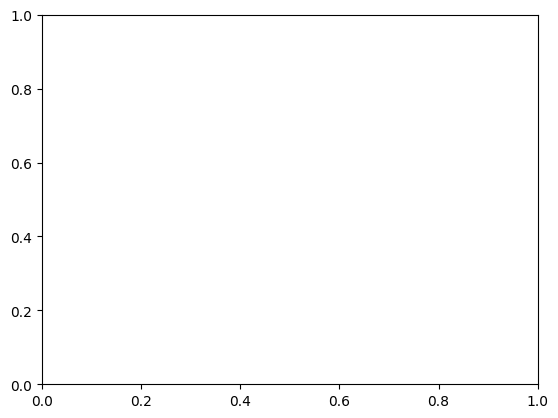

In [25]:
print(len(res[0]))
print(res[0])

150


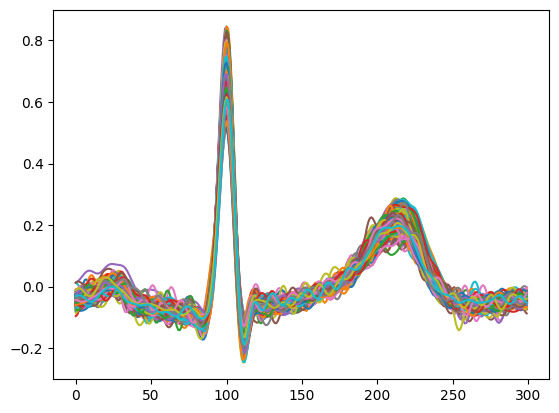

In [28]:
from biosppy.clustering import mdist_templates

templates_person = templates[labels <= 3]
res = mdist_templates(data=templates_person,  clusters=dic[0],  ntemplates=150)

print(len(res[0]))

plt.plot(res[0].T)
plt.show()

## Data Analysis  

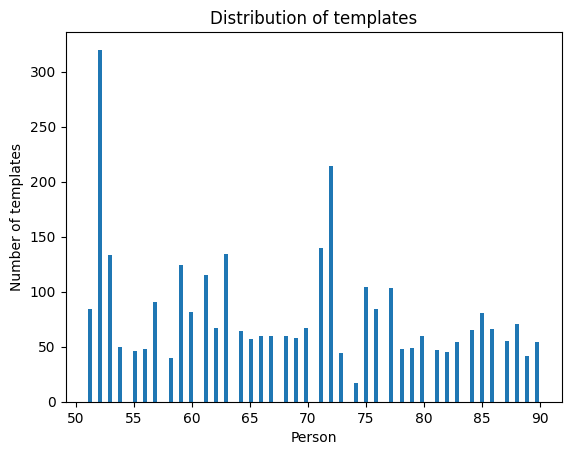

In [12]:
plt.title('Distribution of templates')
plt.xlabel('Person')
plt.ylabel('Number of templates')
plt.hist(labels[labels>50], bins=numb_persons, rwidth=0.8)
plt.show()


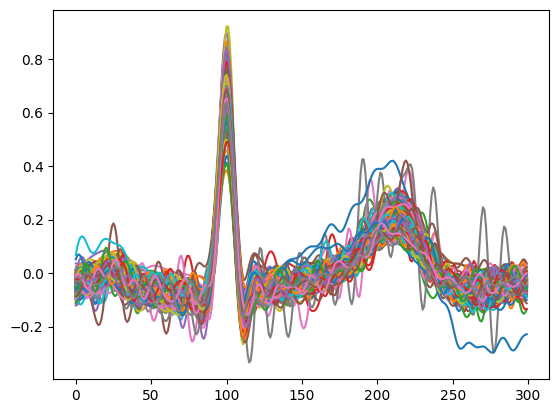

In [74]:
plt.plot(templates_person.T)
plt.show()

## Labels

In [46]:
users = [ p for p in numb_persons for r in numb_recs]
print(users)
labels = np.hstack([np.ones(len(outs[i]["templates"]))*users[i] for i in range(len(users))])
print(labels.shape)
print(labels)

[1, 2, 3]
(71,)
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 3.
 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3.]


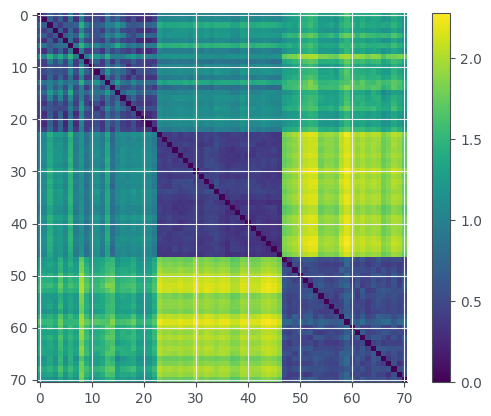

In [181]:
from scipy.spatial import distance

m1 = distance.cdist(templates, templates, 'euclidean')

plt.imshow(m1)
plt.colorbar()
plt.show()

In [182]:
m1.shape

(71, 71)

In [184]:
d = []
for u in users:
  d = np.hstack((d,m1[labels==u][:,labels==u].flatten()))
d.shape

(1681,)

In [183]:
d2 = []
for u in users:
  d2 = np.hstack((d2,m1[labels==u][:,labels!=u].flatten()))
d2.shape

(3360,)

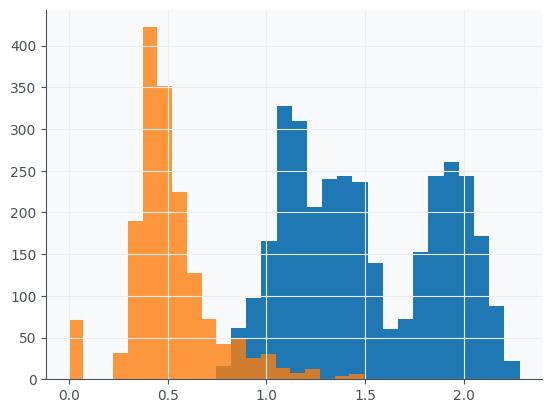

In [160]:
plt.hist(d2, bins=20)
plt.hist(d, bins=20, alpha=0.8)
plt.show();


In [166]:
counts, bins = np.histogram(m[labels==2])
plt.hist(bins[:-1], bins, weights=counts)
plt.show();

IndexError: boolean index did not match indexed array along dimension 0; dimension is 35 but corresponding boolean dimension is 71

In [185]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(templates, labels, test_size=0.5, random_state=42)
y_train[y_train != 1] = 0
y_test[y_test != 1] = 0

In [112]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3, metric='euclidean')
neigh = neigh.fit(X_train, y_train)

In [113]:
y_pred = neigh.predict(X_test)

In [114]:
y_pred

array([1., 1., 0., 1., 0., 1., 1., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       1., 0.])

In [117]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[24,  0],
       [ 1, 11]])

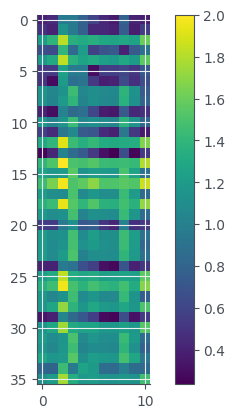

In [197]:
m = distance.cdist(X_test, X_train[y_train==1], 'euclidean')

plt.imshow(m)
plt.colorbar()
plt.show()

In [196]:
d1 = []
d0 = []
print(m.shape)
for z in [0,1]:
  d1 = np.hstack((d1,m[y_train==z][:,y_test==z].flatten()))
  d0 = np.hstack((d1,m[y_train==z][:,y_test!=z].flatten()))

plt.hist(d1, bins=20)
plt.hist(d0, bins=20, alpha=0.8)
plt.show();

(11, 36)


IndexError: boolean index did not match indexed array along dimension 0; dimension is 11 but corresponding boolean dimension is 35

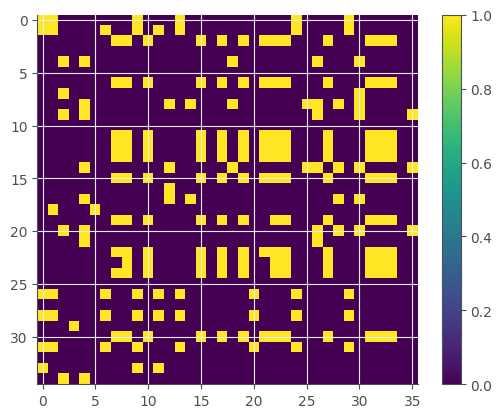

In [159]:
plt.imshow(m < 0.5)
plt.colorbar()
plt.show()

In [157]:
pred = np.min(m, axis =0)
print(pred)
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, pred < .37)

[0.35969934 0.36914627 0.4230088  0.4106809  0.39425988 0.29229456
 0.2850189  0.37559329 0.28550528 0.30129851 0.35228593 0.3658152
 0.42821583 0.23541524 0.39910123 0.40211386 0.60795058 0.34330277
 0.47275101 0.31763633 0.42419633 0.37884569 0.29379058 0.34478839
 0.272453   0.43841832 0.44052204 0.31832747 0.36263318 0.26872296
 0.39156644 0.30307119 0.34524526 0.30877181 0.80444386 0.44754379]


array([[13, 11],
       [ 3,  9]])